In [1]:
from zrl import oc
import matplotlib.pyplot as plt
import os
import yaml
# Define plot characteristics
BASE_DIR = '/home/measure/measurements/2019-03-15_XLD1_F_chip13/'
SQORE_DIR = '/home/measure/qc_code/ibmqc_package/share/sqore/OptimalControl/'
RUN_SQORE = 'run_sqore'

# Run the CMA-ES optimizer with a function call to qc_code measurement

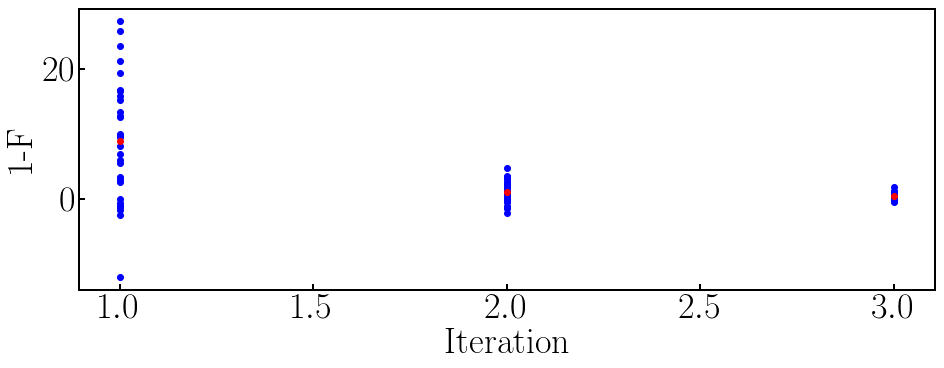

final/bestever f-value = -3.967462e-01 -1.190116e+01
incumbent solution: [1.0088614375615976, 1.0131000724553161, 1.0916202305923133]
std deviation: [0.043971436723657949, 0.017849041156383277, 0.69987288511105095]
['/home/measure/analysis/ZRLLabScripts/jupyter_scripts/gatedef_OC.txt', None]
Q1; |start; X90p; Y90m; Y90m; @barrier3; Y90m; X90m; Y90m; @barrier7; Y90p; X90p; Y90m; @barrier11; Y90p; X90m; @barrier14; QId; @barrier16; Y90p; X90p; @barrier19; Y90m; Y90m; @barrier22; Y90p; X90p; @barrier25; X90m; Y90m; Y90m; @barrier29; X90p; @barrier31; X90m; Y90m; Y90m; @barrier35; xval(0,10); |meas; $

M1; |start; |meas; M; $

TRIG; TRIG; |start; $

MTRIG; TRIG; |meas; $

['/home/measure/analysis/ZRLLabScripts/jupyter_scripts/gatedef_OC.txt', None]
['/home/measure/analysis/ZRLLabScripts/jupyter_scripts/gatedef_OC.txt', None]
Q1; |start; X90p; Y90m; Y90m; @barrier3; Y90p; X90m; @barrier6; Y90p; X90p; @barrier9; Y90p; X90m; @barrier12; X90p; Y90m; Y90m; @barrier16; X90p; X90p; Y90m; @barrier

KeyboardInterrupt: 

In [2]:
#cal_dir = oc.get_cal_dir_name(BASE_DIR)
current_dir = os.getcwd()
os.chdir(BASE_DIR)
qubit = 1 
with open(BASE_DIR+'/exp_params.yaml', 'r') as f:
    exp_params = yaml.load(f)
    
ebr = oc.ExpCMARunner('testcmaes', BASE_DIR, SQORE_DIR, run_sqore='run_sqore')


initial_parameters  = {'Q1':
                      {'X90p': {'amp':0.4222,'delta':-0.43382388359314228,'freq_offset': 1000}, 'Y90p': {'mapto': 'X90p'}, 'X90m': {'mapto': 'X90p'}, 'Y90m': {'mapto': 'X90p'}, 
                      }}

error_bars  = {'Q1':
              {'X90p': {'amp':0.02,'delta':-0.01,'freq_offset': 1000}, 'Y90p': {'mapto': 'X90p'}, 'X90m': {'mapto': 'X90p'}, 'Y90m': {'mapto': 'X90p'}, 
              }}

oc.cmaes_par_search(initial_parameters, error_bars, ebr, qubits=qubit,rep=2, rb_len=10)

os.chdir(current_dir)

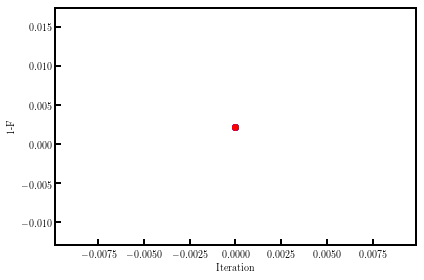

[0.00223618 0.00223618 0.00223618]
{'result': inf, 'parameters': []}
termination on tolfun=1e-08
final/bestever f-value = 2.236179e-03 2.236179e-03
incumbent solution: [0.9617969606967677, 0.978561068559032, 2.2395831065108927]
std deviation: [0.04482146959981584, 0.02243915224772577, 0.9769011907834227]
termination on tolfun=1e-08
final/bestever f-value = 2.236179e-03 2.236179e-03
incumbent solution: [0.9617969606967677, 0.978561068559032, 2.2395831065108927]
std deviation: [0.04482146959981584, 0.02243915224772577, 0.9769011907834227]
best fidelity 0.0022361790220717217


NameError: name 'best' is not defined

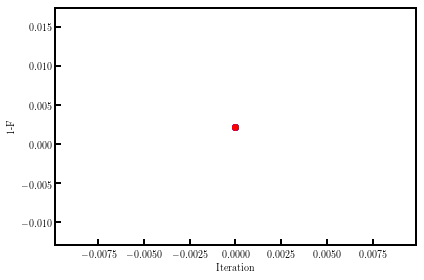

In [6]:
#cal_dir = get_cal_dir_name(BASE_DIR)

# Define system parameters
omega_r = 9e9 * 2 * np.pi
omega_q = 6e9 * 2 * np.pi
w_d = omega_q
delta = 100e6 * 2 * np.pi
g = 200e6 * 2 * np.pi
hbar = 1

# Define Hilbert space
N_r = 3
N_q = 4
a = tensor(destroy(N_r), qeye(N_q))
b = tensor(qeye(N_r), destroy(N_q))
qubit_control = b.dag() + b
H0 = oc.jc_hamiltonian(omega_r, a, omega_q, delta, b, g)

current_dir = os.getcwd()
br = oc.SimCMARunner(H0,w_d)
#ebr = oc.ExpCMARunner('testcmaes', base_dir, SQORE_DIR, run_sqore='run_sqore_precalh')


initial_parameters  = {'Q1':
                      {'X90p': {'amp':0.4222,'delta':-0.43382388359314228,'freq_offset': 1000}, 'Y90p': {'mapto': 'X90p'}}}

error_bars  = {'Q1':
              {'X90p': {'amp':0.02,'delta':-0.01,'freq_offset': 1000}, 'Y90p': {'mapto': 'X90p'}}}

cmaes_par_search(initial_parameters, error_bars, br,rep=2, rb_len=10,pop_size=3)

os.chdir(current_dir)

# Documentation

## Pulse parameter representation

The optimizer internally represents its parameters as a list. When asking for new solutions the optimizer also returns a list. However, the experiment needs to know how to map values in this list to parameters in the different pulses played on the different logical channels (e.g. 'Q1' pulse 'Xp'). Thus, the experiment needs a dictionnary of the form

In [ ]:
{
    'logical_channel1': {
        'pulse1': {'param1': 0.2, 'param2': 1},
        'pulse2': {'param1': 0.2, 'param2': 2}
    },
    'logical_channel2': {
        'pulseA': {'paramA': 2}
    }
}

The class CMARunner implements the two functions unwrap_parameters and wrap_parameters that are necessary to convert the dictionnary to a list and to convert the list back to a dictionnary, respectively.

# Tutorials

These tutorials show how to use the optimal control routines from ZRL.

## Preparing the sqore files

Read this tutorial to find out how sqore files for OC are produced. Experimental functionality is provided by oc.py and can be called through standalone functions or through the Experimental batch runner object:

In [4]:
ebr = oc.ExpCMARunner('testcmaes', BASE_DIR, SQORE_DIR, run_sqore='run_sqore')

ebr.single_length_RB returns a list of qasm sequences as strings. These strings specify randomized benchmarking sequences that will serve to generate the sqore files. An example of one sequence with lenghth two is shown below.

In [14]:
qasm_list = ebr.single_length_RB(1, 2)
qasm_str = qasm_list[0]
print(qasm_str)

# basisfile = /home/measure/sw-backend-qsoft-legacy/setup/benchmarking/x90y90_basis.qasm
# n1 = 1
# m = [2 ... 2, step 1] 
# RB Type = 1
# loading Clifford groups from "/home/measure/sw-backend-qsoft-legacy/setup/benchmarking/x90y90_basis.qasm.dir" ...
# single qubit elements: 24
# two qubit elements: 576
# seed = 1553782496185
# length 2
Y90p 1
X90p 1
Y90m 1
#SIM BARRIER END
X90p 1
Y90m 1
Y90m 1
#SIM BARRIER END
Y90m 1
X90m 1
#SIM BARRIER END
#XVAL(0,2)
# maximum non-unitarity of any sequence 1.13687e-13



The qasm string is converted to a **generic sqore file**, shown below, that can be used to generate the pulse sequences. The generic sqore file has placeholders for the parameters of the pulses. Each individual in the CMA-ES population, corresponding to a pulse sequence, has different values of the parameters of the pulses. The different pulse sequences are therefore created by replacing the placeholders with the parameters of the pulses for each individual.

In [13]:
sqore_file = oc.build_sqore(qasm_str, 4)
sq_str = sqore_file.print_sq2()

['/home/measure/analysis/ZRLLabScripts/jupyter_scripts/gatedef_OC.txt', None]
Q1; |start; QId; |meas; xval(nan,0); $
Q1; |start; QId; |meas; xval(nan,0); $
Q1; |start; QId; |meas; xval(nan,0); $
Q1; |start; QId; |meas; xval(nan,0); $
Q1; |start; Xp; |meas; xval(nan,1); $
Q1; |start; Xp; |meas; xval(nan,1); $
Q1; |start; Xp; |meas; xval(nan,1); $
Q1; |start; Xp; |meas; xval(nan,1); $
Q1; |start; Y90m; @barrier1; Y90m; X90p; @barrier4; X90m; Y90m; Y90m; @barrier8; xval(0,2); |meas; $

M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $

TRIG; TRIG; |start; $
TRIG; TRIG; |start; $
TRIG; TRIG; |start; $
TRIG; TRIG; |start; $
TRIG; TRIG; |start; $
TRIG; TRIG; |start; $
TRIG; TRIG; |start; $
TRIG; TRIG; |start; $
TRIG; TRIG; |start; $

MTRIG; TRIG; |meas; $
MTRIG; TRIG; |meas; $
MTRIG; TRIG; |meas; $
MTRIG; TRIG; |meas; $
MTRIG; T

The example below shows the contents of the sqore file that is produced. The function $\texttt{make_template_sqore_file}$ internally calls the previous functions on any qasm input to produce this sqore file. Such sqore files are run each time the fidelity of a CMA-ES point needs to be evaluated.

In [16]:
parameters = [{'Q1':{'X90p':{'amp': 0.9, 'delta': 0.1}, 'X90m':{'mapto': 'X90p', 'delta': 10}}, 'Q2': {'Y90p': {'delta': 0.0}}}, 
              {'Q1':{'X90p':{'amp': 0.7, 'delta': 0.2}, 'X90m':{'mapto': 'X90p', 'delta': 20}}, 'Q2': {'Y90p': {'delta': 0.0001}}}] 

ebr.make_template_sqore_file(qasm_list, parameters, SQORE_DIR)

with open(SQORE_DIR + 'CMASearch.sq2', 'r') as fin:
    print(fin.read())

['/home/measure/analysis/ZRLLabScripts/jupyter_scripts/gatedef_OC.txt', None]
Q1; |start; Y90p; X90p; Y90m; @barrier3; X90p; Y90m; Y90m; @barrier7; Y90m; X90m; @barrier10; xval(0,2); |meas; $

M1; |start; |meas; M; $

TRIG; TRIG; |start; $

MTRIG; TRIG; |meas; $

['/home/measure/analysis/ZRLLabScripts/jupyter_scripts/gatedef_OC.txt', None]
Q1; |start; QId; |meas; xval(nan,0); $
Q1; |start; QId; |meas; xval(nan,0); $
Q1; |start; QId; |meas; xval(nan,0); $
Q1; |start; Xp; |meas; xval(nan,1); $
Q1; |start; Xp; |meas; xval(nan,1); $
Q1; |start; Xp; |meas; xval(nan,1); $
Q1; |start; Y90p; X90p('amp': 0.9, 'delta': 0.1); Y90m; @barrier3; X90p('amp': 0.9, 'delta': 0.1); Y90m; Y90m; @barrier7; Y90m; X90m('delta': 10, 'amp': 0.9); @barrier10; xval(0,0); |meas; $

M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $
M1; |start; |meas; M; $

TRIG; TRIG; |start; $
TRIG; TRIG; |start; $
TRIG; TRIG; |start; $


## Acquiring data

In [ ]:
ebr = ExpBatchRunner('test_cmaes', SQORE_DIR)

ebr.evaluate_sequences(3, 50, [{'amp': 0.90}, {'amp': 0.85}, {'amp': 0.80}])

In [ ]:
ebr.evaluate_sequences(3, 50, [{'amp': 0.90}, {'amp': 0.85}, {'amp': 0.80}])

In [ ]:
#cal_dir = get_cal_dir_name(BASE_DIR)
current_dir = os.getcwd()
os.chdir(BASE_DIR)
qubit = 'Q1'
with open(BASE_DIR+'/exp_params.yaml', 'r') as f:
    exp_params = yaml.load(f)
initial_parameters  = {'Q1':
                      {'X90p': {'amp':0.2,'delta':0.1}}, 'Y90p': {'mapto': 'X90p', 'delta': 0.2}, 'X90m': {'mapto': 'X90p'}, 'Y90m': {'mapto': 'X90p'}, 
                      }

error_bars  = {'Q1':
              {'X90p': {'amp':0.2,'delta':0.1}}, 'Y90p': {'mapto': 'X90p'}, 'X90m': {'mapto': 'X90p'}, 'Y90m': {'mapto': 'X90p'}, 
              }
cmaes_par_search(initial_parameters,error_bars)

os.chdir(current_dir)

Initialize by retrieving the initial values from exp_params file and start cma es optimizer